In [2]:
from __future__ import print_function

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import mne

import ecogtools
from scipy.stats import ttest_ind

%matplotlib inline

mne.set_log_level(verbose=False)

In [3]:
patient_num = "2002"
channels = ['RTG22', 'RTG23', 'RTG24', 'RTG30', 'RTG31', 'RTG32', 'RTG38', 'RTG39', 'RTG40', 'RTG46', 'RTG47', 'RTG48']

In [4]:
data = ecogtools.ToM_Localizer(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [16]:
# Create evoked for Time of Response
belief_tr_evoked = data.create_evoked("b/time_of_resp")
photo_tr_evoked = data.create_evoked("p/time_of_resp")
TR_evoked = mne.combine_evoked([belief_tr_evoked, photo_tr_evoked], weights=[1, -1])

In [17]:
TR_times = {"tmin":-3., "tmax":1.}
TR_baseline = (0., 1.)

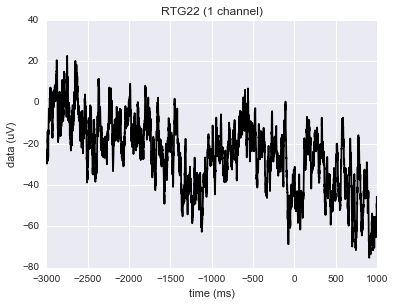

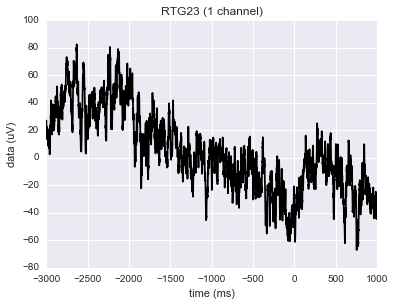

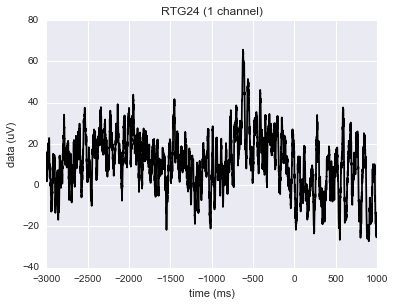

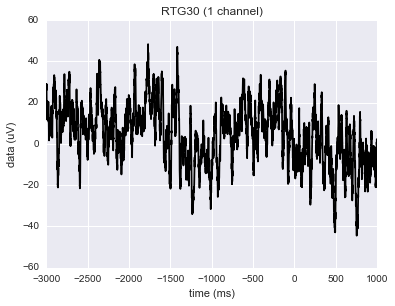

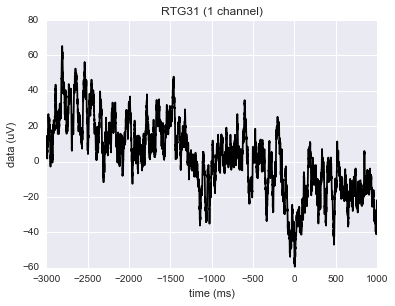

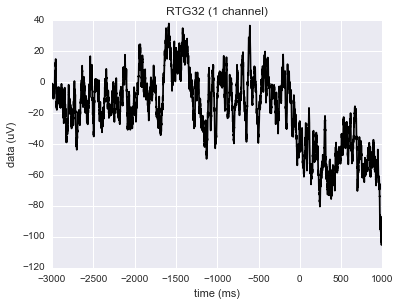

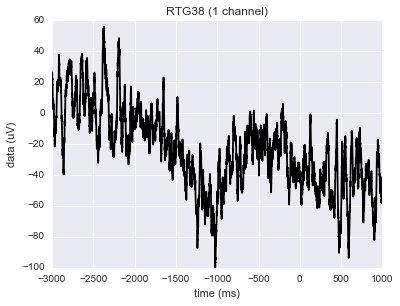

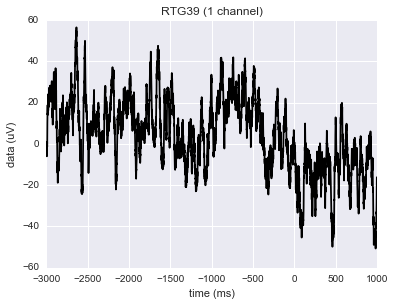

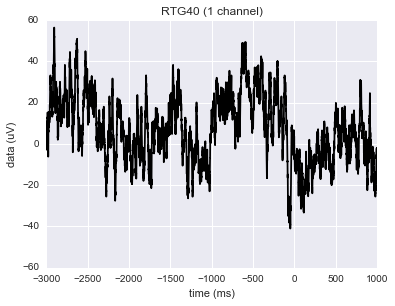

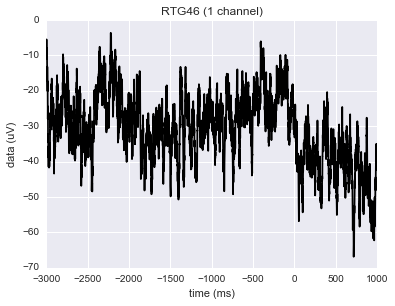

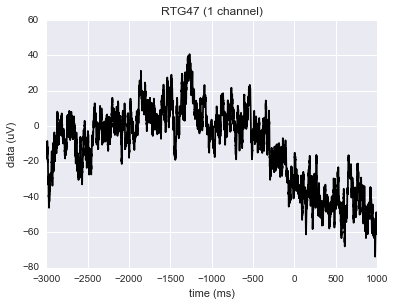

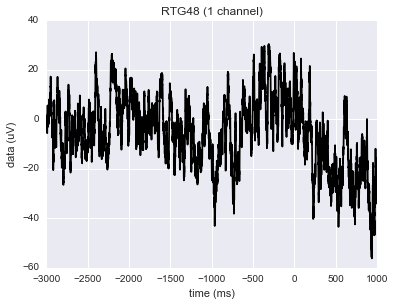

In [18]:
for i in range(len(channels)):
    TR_evoked.crop(**TR_times).plot([i], titles=channels[i]);

In [19]:
patient_num = "2003"
channels = ['LTG5', 'LTG6', 'LTG7', 'LTG8', 'LTG13', 'LTG14', 'LTG15', 'LTG16', 'LTG21', 'LTG22', 'LTG23', 'LTG24']

In [20]:
data = ecogtools.ToM_Localizer(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [21]:
# Create evoked for Time of Response
belief_tr_evoked = data.create_evoked("b/time_of_resp")
photo_tr_evoked = data.create_evoked("p/time_of_resp")
TR_evoked = mne.combine_evoked([belief_tr_evoked, photo_tr_evoked], weights=[1, -1])

In [22]:
TR_times = {"tmin":-3., "tmax":1.}
TR_baseline = (0., 1.)

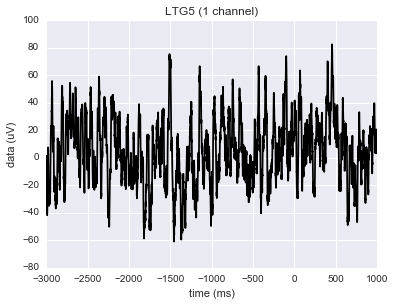

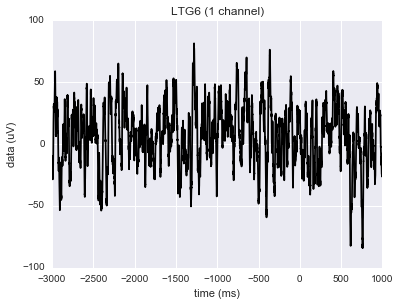

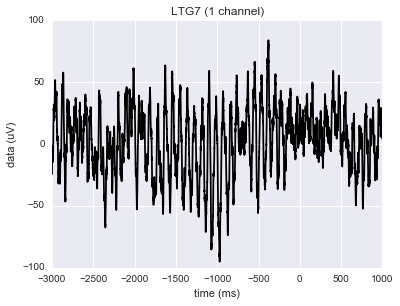

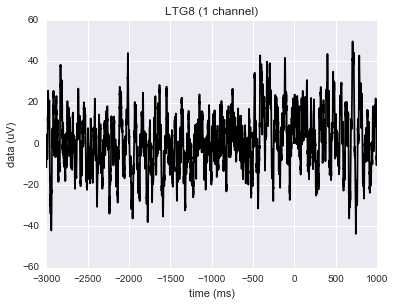

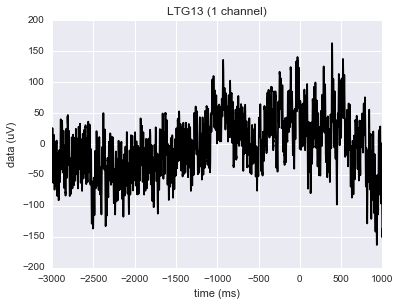

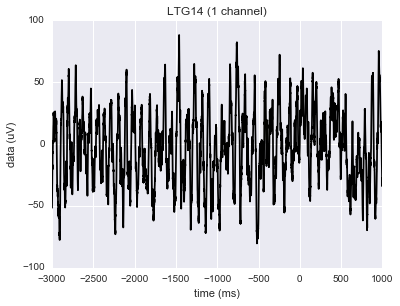

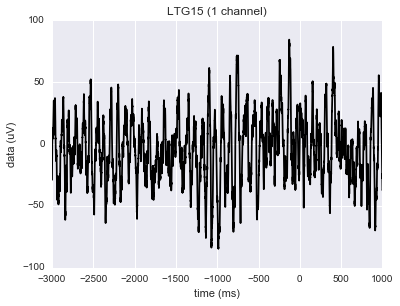

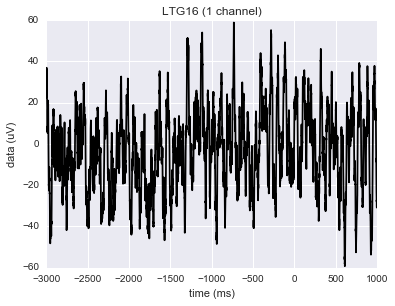

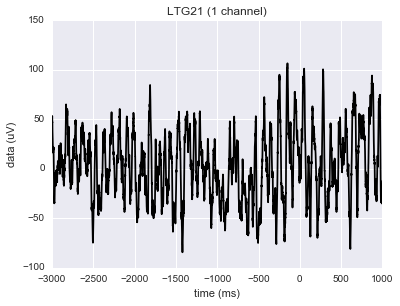

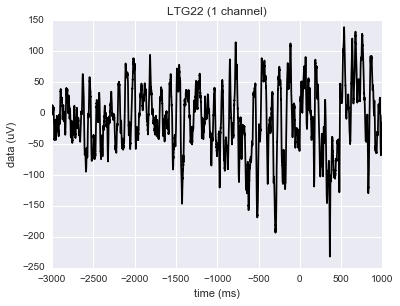

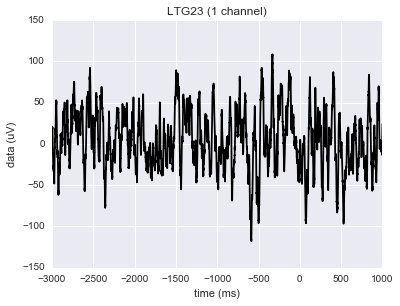

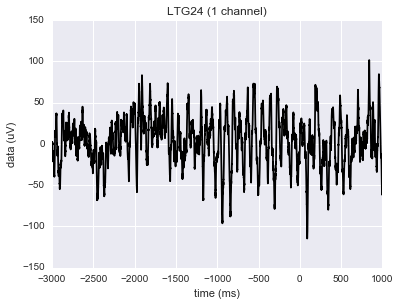

In [23]:
for i in range(len(channels)):
    TR_evoked.crop(**TR_times).plot([i], titles=channels[i]);

In [24]:
patient_num = "2007"
channels = ['RFG5', 'RFG6', 'RFG7', 'RFG8', 'RFG13', 'RFG14', 'RFG15', 'RFG16', 'RFG21', 'RFG22', 'RFG23', 'RFG24']
#channels = ['RFG22', 'RFG23', 'RFG24', 'RFG30', 'RFG31', 'RFG32', 'RFG38', 'RFG39', 'RFG40', 'RFG46', 'RFG47', 'RFG48']

In [25]:
data = ecogtools.ToM_Localizer(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [26]:
# Create evoked for Time of Response
belief_tr_evoked = data.create_evoked("b/time_of_resp")
photo_tr_evoked = data.create_evoked("p/time_of_resp")
TR_evoked = mne.combine_evoked([belief_tr_evoked, photo_tr_evoked], weights=[1, -1])

In [29]:
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

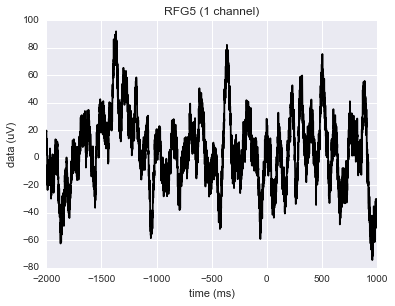

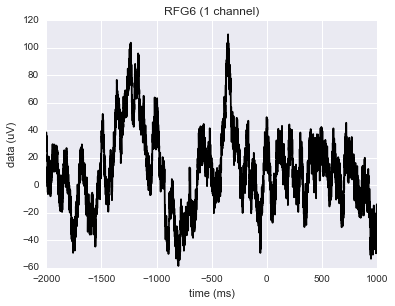

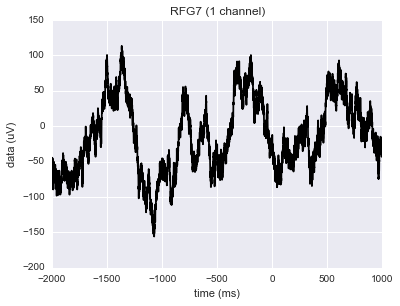

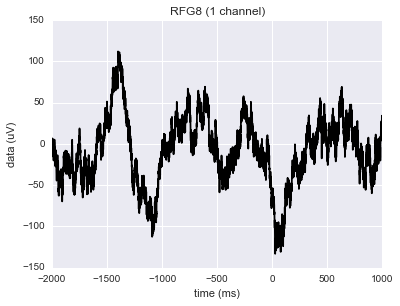

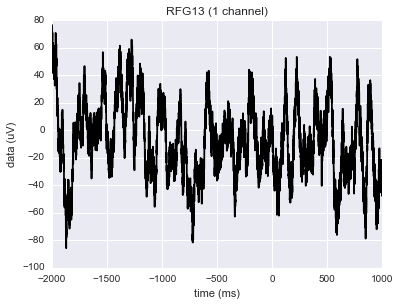

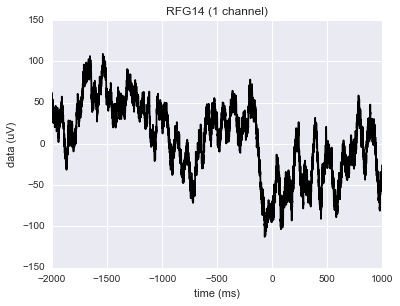

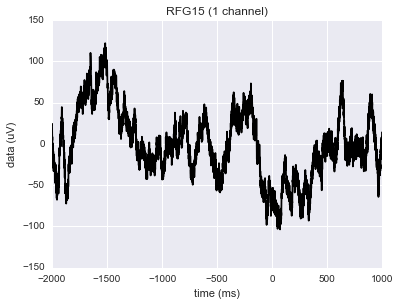

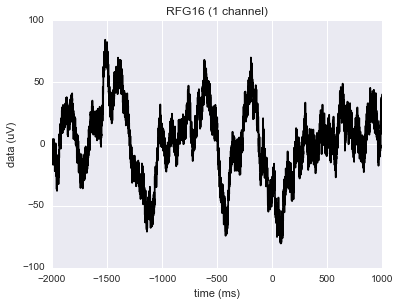

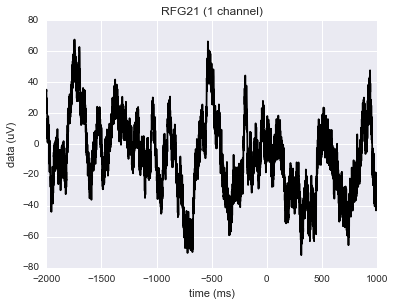

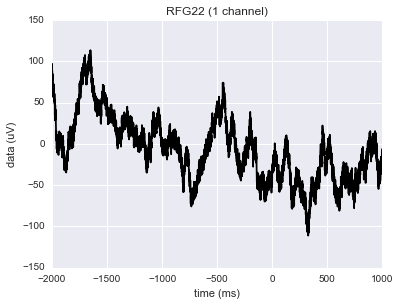

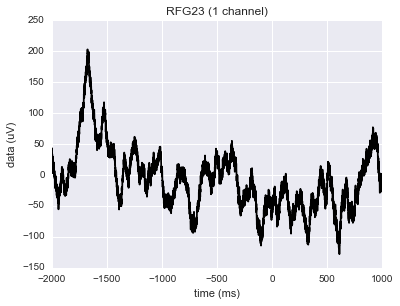

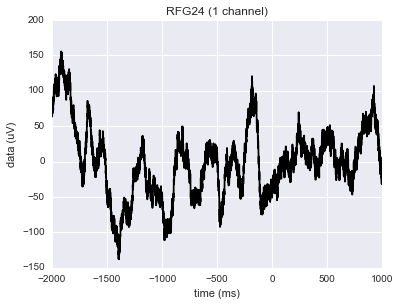

In [30]:
for i in range(len(channels)):
    TR_evoked.crop(**TR_times).plot([i], titles=channels[i]);